Name : Vineeth Chennuru

____
____
# HW: Classification

____
Read Chapter 3 of your textbook. We will spend two weeks on this content.

Solve Excercise 1 on p. 129 (Third Edition). 

Recall that, in contrast to the ICAs, HWs and PCAs are done on your own. Be sure to put your name at the top of the notebook before submitting to D2L. 

____

Soon we will discuss your projects in more detail. For this week, let's just get a sense for the size and scope of a project. In this way you can start thinking about whether your ideas fall within the scope of a project for this class. 

There is one caveat, however. The projects the students do in this class are quite diverse. Certainly they will all fall across the machine learning landscape, but some will involve hardward (e.g., robots and reinforcement learning) or interactivity (e.g, chatbots). As a result, it is not possible to write down one strict set of rules for the projects; instead, try to understand the spirit of the project's goals. Ultimately, this class is about you learning machine learning, not checking boxes to get a grade. 

With that caveat, turn to Appendix A in your textbook, p. 779 (Third Edition): ***Machine Learning Project Checklist***. Read this appendix; some of the ideas won't yet be familiar to you, but we will cover everything. 

Finally, open a markdown cell and write a paragraph about what you think your project might be. You are absolutely not locked to anything you write, and you might consider putting three ideas you want to explore over the next few weeks. As most ideas don't work out (not for any fault of your's), having backup plans is useful.


In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the `images/classification` folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook to save the figures in high-res for the book:

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [4]:
# extra code – it's a bit too long
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [5]:
mnist.keys()  # extra code – we only use data and target in this notebook

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
X, y = mnist.data, mnist.target
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
X.shape

(70000, 784)

In [8]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [9]:
y.shape

(70000,)

In [10]:
28 * 28

784

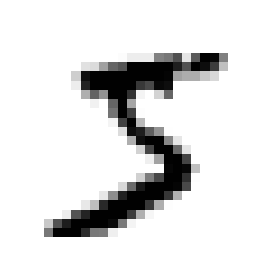

In [11]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
save_fig("some_digit_plot")  # extra code
plt.show()

In [12]:
y[0]

'5'

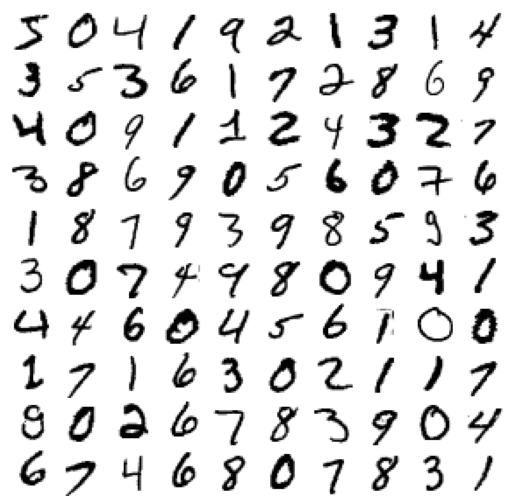

In [13]:
# extra code – this cell generates and saves Figure 3–2
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
baseline_accuracy = knn_clf.score(X_test, y_test)
baseline_accuracy

0.9688

Great! A regular KNN classifier with the default hyperparameters is already very close to our goal.

Let's see if tuning the hyperparameters can help. To speed up the search, let's train only on the first 10,000 images:

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 6]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train[:10_000], y_train[:10_000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [18]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [19]:
grid_search.best_score_

0.9441999999999998

The score dropped, but that was expected since we only trained on 10,000 images. So let's take the best model and train it again on the full training set:

In [20]:
grid_search.best_estimator_.fit(X_train, y_train)
tuned_accuracy = grid_search.score(X_test, y_test)
tuned_accuracy

0.9714

### Project Ideas :
- I would like to be my project around a Time Series data - Time Series regression or Time Series Classification.

Examples of Time Series Regression data are :
    
    - COVID cases/deaths/
    - Weather data.
    - Rainfall measurements.
    - Temperature readings.
    - Heart rate monitoring (EKG)
    - Brain monitoring (EEG)
    
    
Examples of Time Series Classification data are :
    
    - Classify of whom a voice recording is
    - Classify an ECG as normal or give the type of abnormality.
    - Surveillance: From a video, capture the path of an individual, then classify what he/she is doing.
    - Internet-of-things: classify whether a kitchen device is malfunctioning.
    - Speech recognition
    - Classification of brain imaging or genetic expression data

I would be picking similar problems from above mentioned list and following all Machine Learning Project Checklist provided in APPENDIX A.


____
# Streamlit for Web Apps

We will use Streamlit to use and build web apps for this course. As mentioned in the lecture, these web apps will serve two purposes: your education and your projects. 

This week we will begin by exploring the educational aspect by using a Streamlit web app in the ICA this week. For this PCA your main task is to get Streamlit working on your computer in advance. The goal is that you use web apps to train your intuition on machine learning. As we have already seen, there are _many_ moving parts in the machine learning workflow, all working together in a complex way.

If you have any issues, please post them on Slack. There are always a few people who run into issues unique to their laptop, and other students might have already solved similar problems on theirs. 

Your tasks for the PCA are these:
* Search through the [Streamlit](https://streamlit.io) website to get comfortable with what is there.
* Install Streamlit on your computer.
* Ensure that Streamlit works by writing an app: the main webpage gives a very short code called `MyApp.py`. 
* Watch the first three videos in [this series](https://www.youtube.com/watch?v=ZZ4B0QUHuNc&list=PLtqF5YXg7GLmCvTswG32NqQypOuYkPRUE), and bookmark these videos in case you need them later. (Of course, feel free to watch all of them, which eventually you will want to do. But, we will generally not use Heroku in this class because of its cost; rather, we will deploy directly to Streamlit.)
* Other than learning the various tools within Streamlit, the biggest hurdle is getting the `requirements.txt` file set up correctly. This is how Streamlit knows how to set up the Python environment for your particular app. Pay close attention to which files you need and what their purpose is.

Again, if you run into any issues, post your questions in Slack. Be sure to give enough background information that other students know enough about what you did to be able to help. 




**Github code link for sample streamlit app** : https://github.com/vineethchennuru/HW-2

**Streamlit sample app link** : https://vineethchennuru-hw-2-app-8mo1yw.streamlit.app